In [1]:
#Radial Basis Function (RBF) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('Train.csv')
x_train = df.drop(columns=['class'])
y_train= df['class']
y_trainsample = y_train.head(100)

In [4]:
for column in x_train.columns:
    if x_train[column].dtype==type(object):
         labelencoder = LabelEncoder()
         x_train[column] = labelencoder.fit_transform(x_train[column])
x_trains = x_train.head(100)

In [5]:
labelencoder = LabelEncoder()

y_train = labelencoder.fit_transform(y_trainsample)

In [6]:
model = SVC(kernel='rbf', probability=True, C=1, gamma ='scale')
model.fit(x_trains, y_train)

SVC(C=1, probability=True)

In [7]:
df2 = pd.read_csv('Test.csv')
x1 = df2.drop(columns = ['class'])
y1= df2['class']
y2 = y1.head(100)
for column in x1.columns:
    if x1[column].dtype == type(object):
        labelencoder1 = LabelEncoder()
        x1[column] = labelencoder1.fit_transform(x1[column])


In [8]:
labelencoder = LabelEncoder()

y_test = labelencoder.fit_transform(y2)

In [9]:
x_test = x1.head(100)

In [10]:
# Predict class labels on training data
pred_labels_tr = model.predict(x_trains)
    # Predict class labels on a test data
pred_labels_te = model.predict(x_test)

In [11]:

print('----- Evaluation on Training Data -----')
score_tr = model.score(x_trains, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')

----- Evaluation on Training Data -----
Accuracy Score:  0.82
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        52
           1       1.00      0.62      0.77        48

    accuracy                           0.82       100
   macro avg       0.87      0.81      0.81       100
weighted avg       0.87      0.82      0.81       100

--------------------------------------------------------


In [12]:
# Use score method to get accuracy of the model
print('----- Evaluation on Test Data -----')
score_te = model.score(x_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')

----- Evaluation on Test Data -----
Accuracy Score:  0.81
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        49
           1       0.83      0.78      0.81        51

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100

--------------------------------------------------------


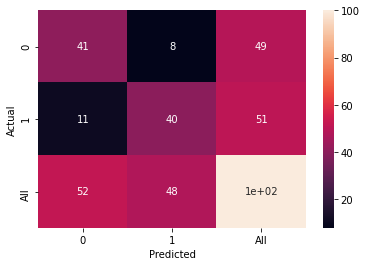

In [13]:
cm = pd.crosstab(y_test, pred_labels_te, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(cm, annot=True)
plt.show()